In [1]:
%matplotlib inline

# Kmeans

A implementation of k-means clustering.

> from mlxtend.cluster import Kmeans

## Overview

Clustering falls into the category of unsupervised learning, a subfield of machine learning where the ground truth labels are not available to us in real-world applications. In clustering, our goal is to group samples by similarity (in k-means: Euclidean distance).

The k-means algorithms can be summarized as follows:

1. Randomly pick k centroids from the sample points as initial cluster centers.
2. Assign each sample to the nearest centroid $\mu(j), \; j \in {1,...,k}$.
3. Move the centroids to the center of the samples that were assigned to it.
4. Repeat steps 2 and 3 until the cluster assignments do not change or a user-defined tolerance or a maximum number of iterations is reached.

### References


- MacQueen, J. B. (1967). [Some Methods for classification and Analysis of Multivariate Observations](http://projecteuclid.org/euclid.bsmsp/1200512992). Proceedings of 5th Berkeley Symposium on Mathematical Statistics and Probability. University of California Press. pp. 281–297. MR 0214227. Zbl 0214.46201. Retrieved 2009-04-07.

## Example 1 - Three Blobs

#### Load some sample data:

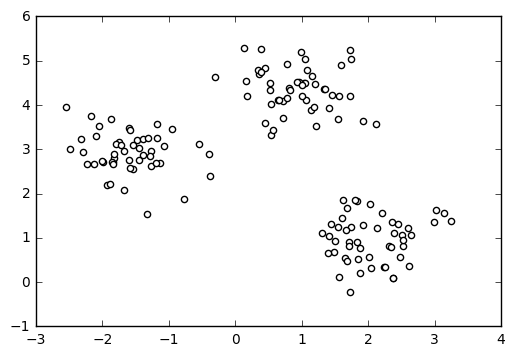

In [2]:
import matplotlib.pyplot as plt
from mlxtend.data import three_blobs_data

X, y = three_blobs_data()
plt.scatter(X[:, 0], X[:, 1], c='white')
plt.show()

#### Compute the cluster centroids:

In [3]:
from mlxtend.cluster import Kmeans

km = Kmeans(k=3, 
            max_iter=50, 
            random_seed=1, 
            print_progress=3)

km.fit(X)

print('Iterations until convergence:', km.iterations_)
print('Final centroids:\n', km.centroids_)

Iteration: 2/50 | Elapsed: 00:00:00 | ETA: 00:00:00

Iterations until convergence: 2
Final centroids:
 [[-1.5947298   2.92236966]
 [ 2.06521743  0.96137409]
 [ 0.9329651   4.35420713]]


#### Visualize the cluster memberships:

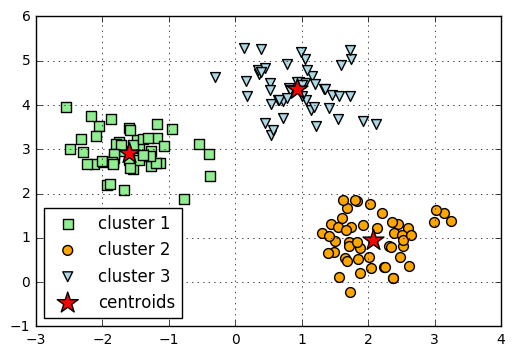

In [4]:
y_clust = km.predict(X)

plt.scatter(X[y_clust == 0, 0],
            X[y_clust == 0, 1],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster 1')

plt.scatter(X[y_clust == 1,0],
            X[y_clust == 1,1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')

plt.scatter(X[y_clust == 2,0],
            X[y_clust == 2,1],
            s=50,
            c='lightblue',
            marker='v',
            label='cluster 3')


plt.scatter(km.centroids_[:,0],
            km.centroids_[:,1],
            s=250,
            marker='*',
            c='red',
            label='centroids')

plt.legend(loc='lower left',
           scatterpoints=1)
plt.grid()
plt.show()

## API

In [1]:
with open('../../api_modules/mlxtend.cluster/Kmeans.md', 'r') as f:
    print(f.read())

## Kmeans

*Kmeans(k, max_iter=10, convergence_tolerance=1e-05, random_seed=None, print_progress=0)*

K-means clustering class.

Added in 0.4.1dev

**Parameters**

- `k` : int

    Number of clusters

- `max_iter` : int (default: 10)

    Number of iterations during cluster assignment.
    Cluster re-assignment stops automatically when the algorithm
    converged.

- `convergence_tolerance` : float (default: 1e-05)

    Compares current centroids with centroids of the previous iteration
    using the given tolerance (a small positive float)to determine
    if the algorithm converged early.

- `random_seed` : int (default: None)

    Set random state for the initial centroid assignment.

- `print_progress` : int (default: 0)

    Prints progress in fitting to stderr.
    0: No output
    1: Iterations elapsed
    2: 1 plus time elapsed
    3: 2 plus estimated time until completion

**Attributes**

- `centroids_` : 2d-array, shape={k, n_features}

    Feature values of the k cluster cent